In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import sklearn.model_selection as model_selection

# leemos el archivo casas.csv
df = pd.read_csv('casas.csv')

# dividimos los datos en entrenamiento y validación 70 30
train, test = model_selection.train_test_split(df, test_size=0.3, random_state=0)

print('train:', (train))
print('test:', (test))

train:    Terreno (m2)  Precio (MDP)
9         468.0          1.08
1         616.0          1.42
6         594.0          1.37
7         625.0          1.44
3         963.0          2.21
0         440.0          1.01
5         255.0          0.59
test:    Terreno (m2)  Precio (MDP)
2         381.0          0.88
8         708.0          1.63
4         431.0          0.99


Creamos el algoritmo de BGD

In [25]:
w = 0
alpha = 0.00000007
y = lambda x: w * x # función de regresión lineal
y_pred = [] # predicciones
ws = [] # pesos
error = [] # error de estimación
x_real = train['Terreno (m2)']
y_real = train['Precio (MDP)']
x_real_test = test['Terreno (m2)']
y_real_test = test['Precio (MDP)']


# ejecutamos las iteraciones de BGD
for i in range(4):
    # calculamos el peso
    w = w - 2*alpha * np.dot((w * x_real - y_real), x_real)
    # calculamos una predicción
    y_pred.append(y(x_real_test))
    # calculamos el error de estimación
    error.append(np.sum(abs(y(x_real_test) - y_real_test)))
    # guardamos el peso
    ws.append(w)

# impiirmos los pesos
print('ws:', *ws, end='\n\n', sep='\n')

# imprimimos las predicciones
for i in range(len(y_pred)):
    print('y_pred:', *y_pred[i], end='\n')

# imprimimos el error
print('\nerror:', *error, end='\n', sep='\n')


ws:
0.0008143827999999999
0.00134054665030748
0.0016804953788051745
0.0019001325468463942

y_pred: 0.3102798468 0.5765830223999999 0.35099898679999997
y_pred: 0.5107482737671498 0.9491070284176958 0.5777756062825239
y_pred: 0.6402687393247715 1.1897907281940636 0.7242935082650301
y_pred: 0.7239505003484762 1.3452938431672472 0.8189571276907959

error:
2.262138144
1.4623690915326304
0.9456470242161347
0.6117985287934806


Hacemos la graficas

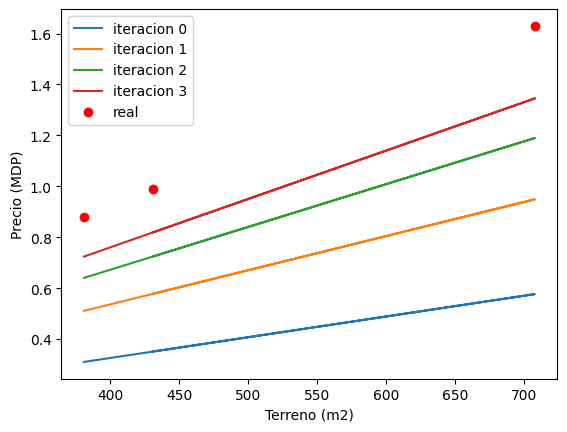

In [26]:
# Graficamos las iteraciones y_pred
line_space = np.linspace(0, 5, 10)
for i in range(len(y_pred)):
    plt.plot(x_real_test, (ws[i] * x_real_test), label=f'iteracion {i}')
    plt.xlabel('Terreno (m2)')
    plt.ylabel('Precio (MDP)')
plt.plot(x_real_test, y_real_test, 'ro', label='real')
plt.legend()
plt.show()

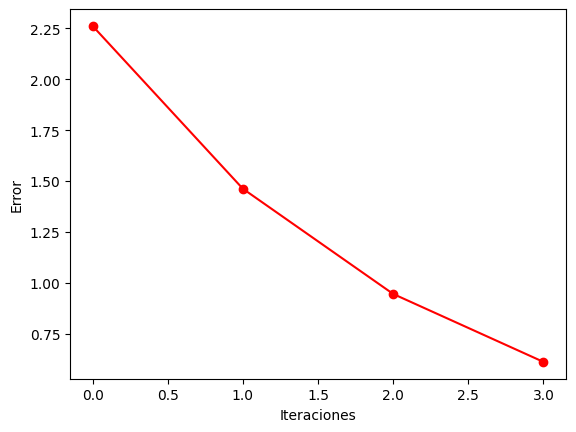

In [27]:
# Graficamos los puntos del error
plt.plot(range(len(error)), error, 'o-', color='red')
plt.xlabel('Iteraciones')
plt.ylabel('Error')
plt.show()